<a href="https://colab.research.google.com/github/niikun/ml_duke_univ/blob/main/torch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
classes = {
    0: "L",
    1: "O",
    2: "V",
    3: "E"
}

In [3]:
X = torch.tensor([
    [[1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1]],
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]],
    [[1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [0, 1, 0, 1, 0],
     [0, 0, 1, 0, 0]],
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1]]
],dtype=torch.float)

In [4]:
y = torch.tensor([0,1,2,3])

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=2,stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=6,kernel_size=2,stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=6, out_channels=1,kernel_size=2,stride=1,padding=1)
        self._to_linear = None
        x = torch.randn(5,5).view(-1,1,5,5)
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,16)
        self.fc2 = nn.Linear(16,16)
        self.fc3 = nn.Linear(16,4)

    def convs(self,x):
        x = F.max_pool2d(self.conv1(x),(2,2))
        x = F.max_pool2d(self.conv2(x),(2,2))
        x = F.max_pool2d(self.conv3(x),(2,2))
        if self._to_linear is None:
            self._to_linear = x.shape[1]*x.shape[2]*x.shape[3]
        return x

    def forward(self,x):
        x = self.convs(x)
        # print(self._to_linear)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x,p=0.1)
        x = self.fc3(x)
        return x


In [6]:
net = CNN()

In [7]:
net(X[0].view(-1,1,5,5))

tensor([[-0.5709,  0.1222,  0.3027,  0.2314]], grad_fn=<AddmmBackward0>)

In [8]:
import torch.optim as optim
loss_func = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(),lr=0.01)
max_epochs = 100

In [9]:
losses=[]
for epoch in range(max_epochs):
    optimizer.zero_grad()
    output = net(X.view(-1,1,5,5))
    loss = loss_func(output,y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


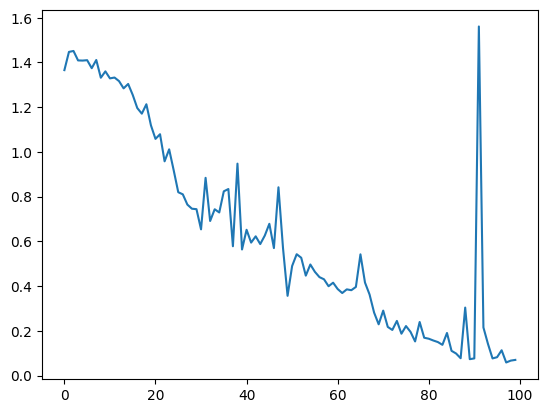

In [10]:
plt.plot(losses)

In [11]:
l =torch.Tensor([[[1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1]]])

o = torch.Tensor([[[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]]])

v = [[[1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [0, 1, 0, 1, 0],
     [0, 0, 1, 0, 0]]]

e= [[[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1],
     [1, 0, 0, 0, 0],
     [1, 1, 1, 1, 1]]]

In [12]:
net(X.view(-1,1,5,5)).max(dim=1)

torch.return_types.max(
values=tensor([12.5958,  1.8214,  2.9886, 16.0223], grad_fn=<MaxBackward0>),
indices=tensor([0, 1, 2, 3]))

In [13]:
classes[net(o.view(-1,1,5,5)).max(dim=1).indices.item()]

'O'

In [14]:
from typing import List

def accuracy (X:List,y:int)->float:
    """入力データをもとに正解率を戻す
    """
    return (net(X.view(-1,1,5,5)).max(dim=1).indices==y).sum().item()/len(y)


In [15]:
accuracy(X,y)

1.0

## Fashion MNIST

### データの前処理

In [16]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

In [17]:
from torchvision import transforms

In [18]:
fashion_mnist_train = FashionMNIST(root="./data",train=True,download=True,transform=transforms.ToTensor())
fashion_mnist_test = FashionMNIST(root="./data",train=False,download=True,transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11856380.30it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201380.90it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3752574.55it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18566016.33it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



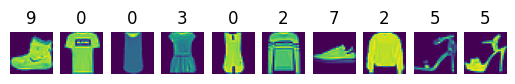

In [19]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(fashion_mnist_train[i][0].view(28,28))
    plt.title(fashion_mnist_train[i][1])
    plt.axis("off")
plt.show()

In [20]:
print(f"fashion_mnist train sample : {len(fashion_mnist_train)}")
print(f"fashion_mnist test sample : {len(fashion_mnist_test)}")

fashion_mnist train sample : 60000
fashion_mnist test sample : 10000


In [21]:
# train_size = int(len(fashion_mnist_train) * 0.8)
# val_size = len(fashion_mnist_train) - train_size

In [22]:
# train_dataset,val_dataset = torch.utils.data.random_split(fashion_mnist_train,[train_size,val_size])

In [23]:
train_loader = DataLoader(fashion_mnist_train,batch_size=128,shuffle=True)
test_loader = DataLoader(fashion_mnist_test,batch_size=64,shuffle=True)

### モデルの構築

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1,16,5,1,0),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16,32,5,1,0),
            nn.Conv2d(32,64,5,1,0),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            # nn.MaxPool2d(2,2)
            )
        self.fc_layers = nn.Sequential(
            nn.Linear(1024,256),
            nn.Dropout(0.2),
            nn.Linear(256,128),
            nn.Dropout(0.2),
            nn.Linear(128,10)
        )
    def forward(self,x):
        x = self.conv_layers(x)
        x = x.view(x.size(0),-1)
        x = self.fc_layers(x)
        return x

In [25]:
fake_data = torch.FloatTensor(8,1,28,28)
net = CNN()
net(fake_data).shape

torch.Size([8, 10])

### モデルの訓練

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
net = CNN().to(device)

In [28]:
import torch.optim as optim
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.01)
max_epochs = 20

In [30]:
import time

# リストの初期化
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

start = time.time()

for epoch in range(max_epochs):
    net.train()
    train_loss = 0
    train_acc = 0

    for i, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = net(X)
        loss = loss_func(output, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += (output.max(dim=1)[1] == y).sum().item()

    # エポックごとの平均損失と精度を計算
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)

    net.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            output = net(X)
            loss = loss_func(output, y)
            val_loss += loss.item()
            val_acc += (output.max(dim=1)[1] == y).sum().item()

    # 検証データに対する平均損失と精度を計算
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

    end = time.time() - start
    print(f"{epoch+1}/{max_epochs}============================================================")
    print(f" train_loss:{avg_train_loss:.4f}, val_loss:{avg_val_loss:.4f}")
    print(f" train_acc:{avg_train_acc:.4f}, val_acc:{avg_val_acc:.4f}")
    print(f"time : {end:.2f} sec")


1/20============================================================
 train_loss:0.0058, val_loss:0.0185
 train_acc:0.8217, val_acc:0.6395
time : 10.13 sec
2/20============================================================
 train_loss:0.0035, val_loss:0.0066
 train_acc:0.8435, val_acc:0.8449
time : 19.86 sec
3/20============================================================
 train_loss:0.0030, val_loss:0.0059
 train_acc:0.8632, val_acc:0.8660
time : 29.65 sec
4/20============================================================
 train_loss:0.0028, val_loss:0.0069
 train_acc:0.8710, val_acc:0.8612
time : 39.42 sec
5/20============================================================
 train_loss:0.0028, val_loss:0.0061
 train_acc:0.8745, val_acc:0.8634
time : 49.18 sec
6/20============================================================
 train_loss:0.0029, val_loss:0.0081
 train_acc:0.8688, val_acc:0.8247
time : 58.31 sec
7/20============================================================
 train_loss:0.0028, val

In [ ]:
plt.plot(train_loss_list)

### モデルの評価

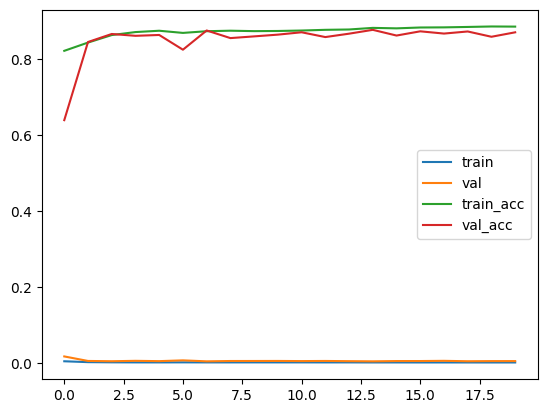

In [33]:
plt.plot(train_loss_list,label="train")
plt.plot(val_loss_list,label="val")
plt.plot(train_acc_list,label="train_acc")
plt.plot(val_acc_list,label="val_acc")
plt.legend()
plt.show()

In [ ]:
plt.plot(losses)